# Initialize

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

from model import VAE_priorCategorical, VAE_priorHFM
import metadata as md
from datasets import Dataset_HFM, Dataset_pureHFM, load_dsprites
from utilities import sample_images, get_empirical_latent_distribution, calculate_kl_divergence_with_HFM
from peak_analysis import get_peaks_data, accumulate_peaks_data, plot_peaks_data, find_peaks_from_empirical_distribution

In [3]:
device = torch.device('cpu')

# Datasets

## dSprites

In [81]:
train_loader_dSprites, val_loader_dSprites = load_dsprites()

## MNIST

In [4]:
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=False
    )

## FashionMNIST

In [5]:
train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=False
    )

## pureHFM

In [6]:
dataset_HFM_train = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_pureHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_pureHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)

## expandedHFM 32-1024

In [49]:
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)

# PriorHFM, klG = log2

## train over dSprites

In [82]:
train_loader = train_loader_dSprites
val_loader = val_loader_dSprites
input_dim = 4096

### latent_dim = 8


In [100]:

data_dict_ld8 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[]}


In [101]:

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [102]:


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [103]:

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [108]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))

<All keys matched successfully>

In [104]:

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [105]:

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [ ]:

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/dSprites/ld8_glog2_ep7_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

### Plot

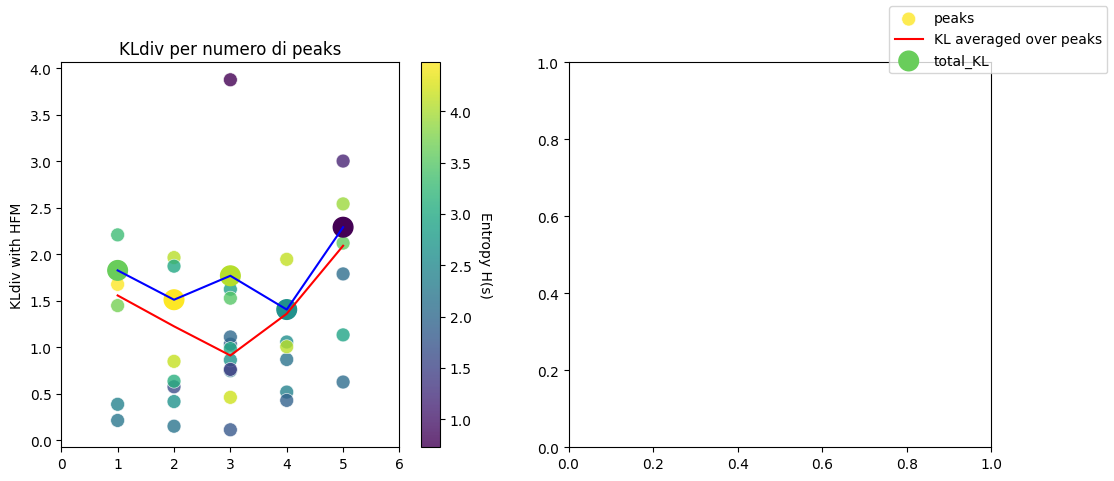

[5, 7, 11, 6, 7]


In [107]:
plot_peaks_data(data_dict_ld8)
print(data_dict_ld8['peaks_number'])

## train over pureHFM

In [63]:
train_loader = train_loader_pureHFM
val_loader = val_loader_pureHFM
input_dim = 512

### latent_dim = 10


In [ ]:
data_dict_ld10 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}


In [ ]:
#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


In [65]:


#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


In [66]:

#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


In [67]:


#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


In [68]:

#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


In [69]:

#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)

### latent_dim = 8


In [ ]:
data_dict_ld8 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1


In [148]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)



#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [149]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3


In [150]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [151]:
#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [152]:
#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


In [153]:
#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

### Plot peaks_data

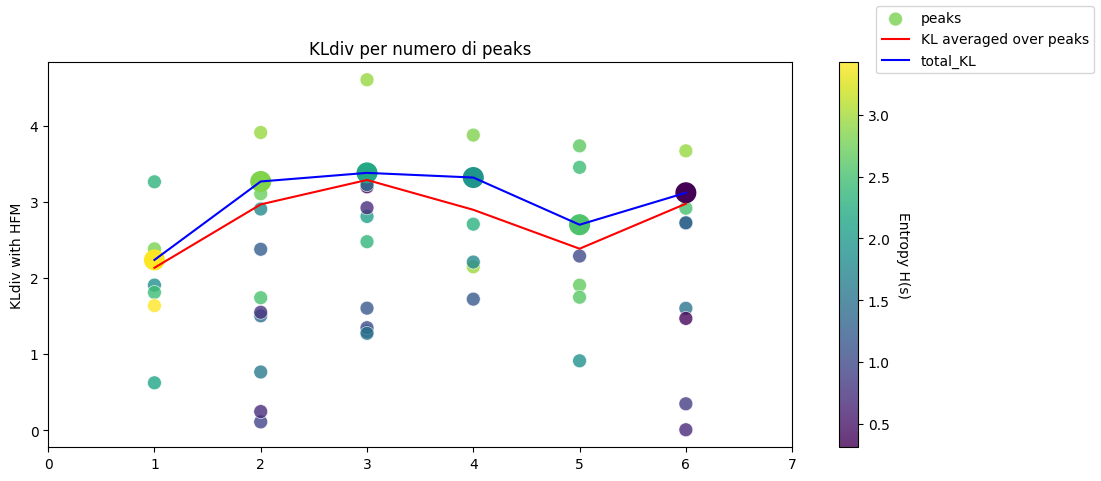

[15, 10, 11, 9, 10, 9]


In [154]:
plot_peaks_data(data_dict_ld8)
print(data_dict_ld10['peaks_number'])

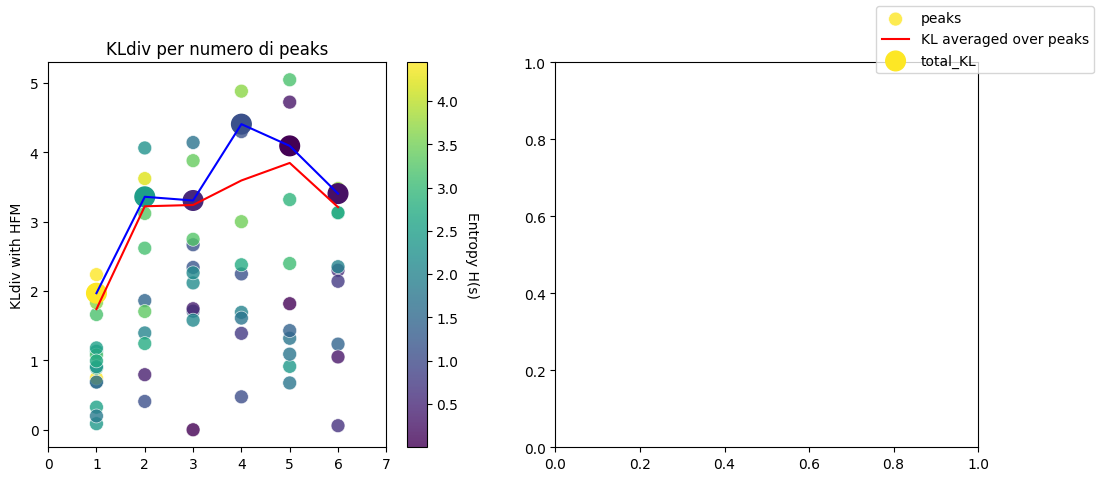

[15, 10, 11, 9, 10, 9]


In [71]:
plot_peaks_data(data_dict_ld10)
print(data_dict_ld10['peaks_number'])

## train over MNIST

In [7]:
train_loader = train_loader_MNIST
val_loader = val_loader_MNIST
input_dim = 784

### latent_dim = 12


In [ ]:
data_dict_ld12 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}
data_dict_ld12_val = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}


#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1


In [131]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)




#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [132]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)



#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3


In [133]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)



#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4


In [134]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)



#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5


In [135]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)



#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6


In [136]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld12, current_data_dict)
current_data_dict_val = get_peaks_data(my_model, val_loader, device)
accumulate_peaks_data(data_dict_ld12_val, current_data_dict_val)

### latent_dim = 6


In [ ]:
data_dict_ld6 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}


#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1


In [123]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)




#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [124]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)



#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3


In [125]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)



#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4


In [126]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)



#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5


In [127]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)



#### features = 6, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6


In [128]:

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld6, current_data_dict)

### latent_dim = 10


In [ ]:
data_dict_ld10 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1


In [294]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)



#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [295]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3


In [296]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)



#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4


In [297]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5


In [298]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)


#### features = 10, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6


In [299]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld10, current_data_dict)

### latent_dim = 8

In [10]:
data_dict_ld8 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1

In [11]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [12]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3

In [13]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

In [8]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))

<All keys matched successfully>

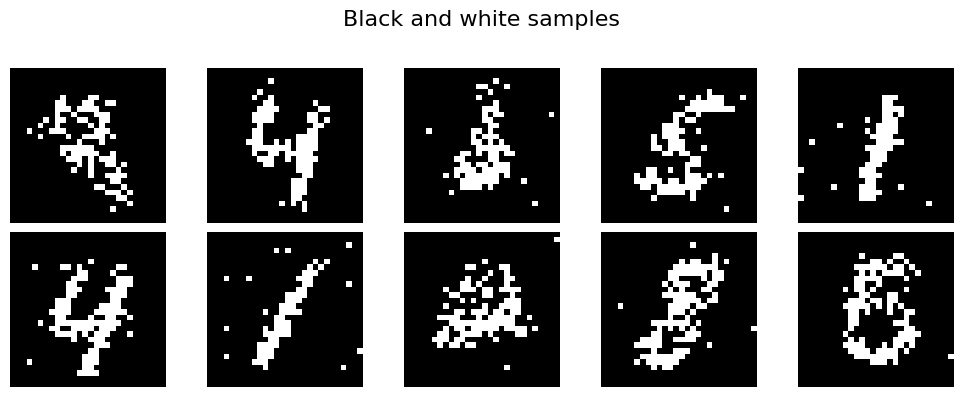

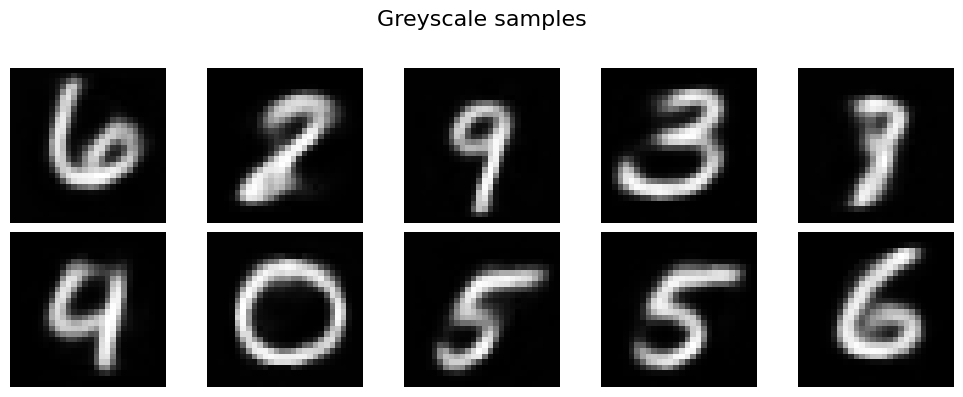

In [9]:
sample_images(my_model)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4


In [14]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5


In [15]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6

In [16]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict_ld8, current_data_dict)

### plot peaks_data

In [17]:
print(data_dict_ld8['peaks_number'])

[6, 6, 12, 5, 9, 5]


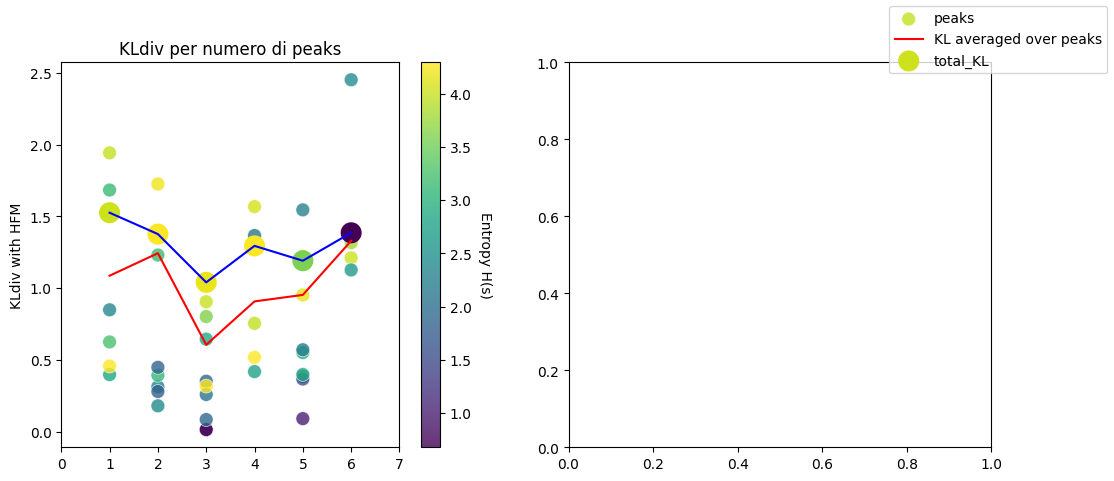

In [ ]:
plot_peaks_data(data_dict_ld8)

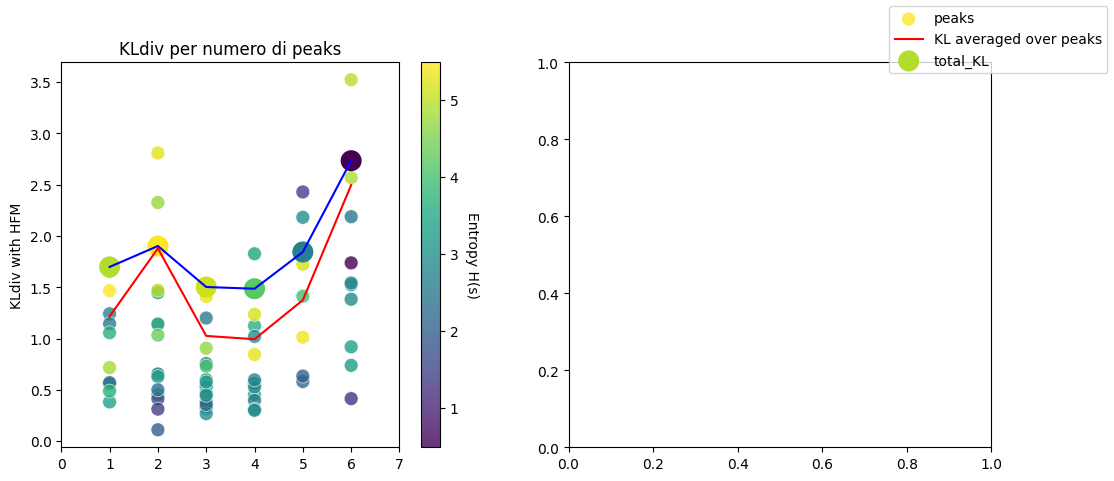

In [300]:
plot_peaks_data(data_dict_ld10)

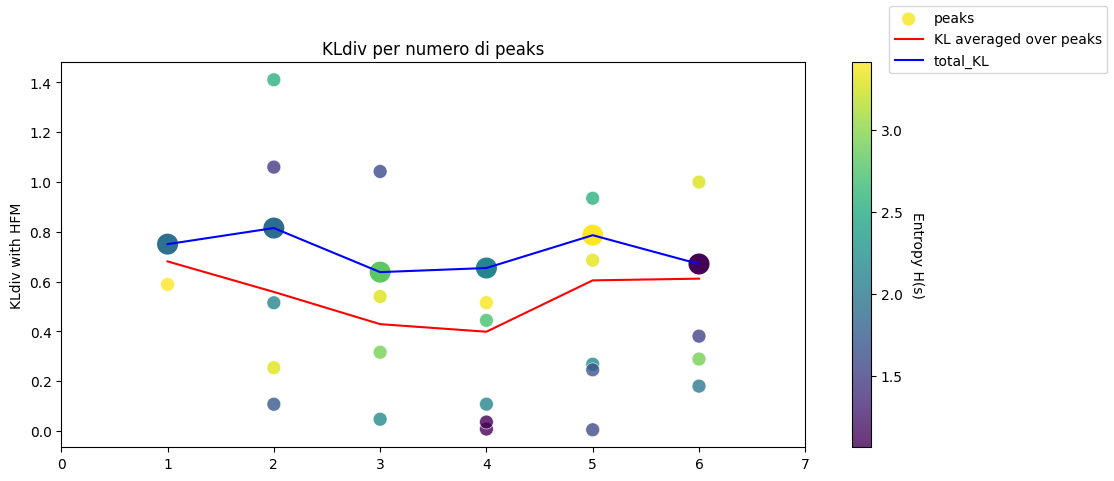

In [129]:
plot_peaks_data(data_dict_ld6)

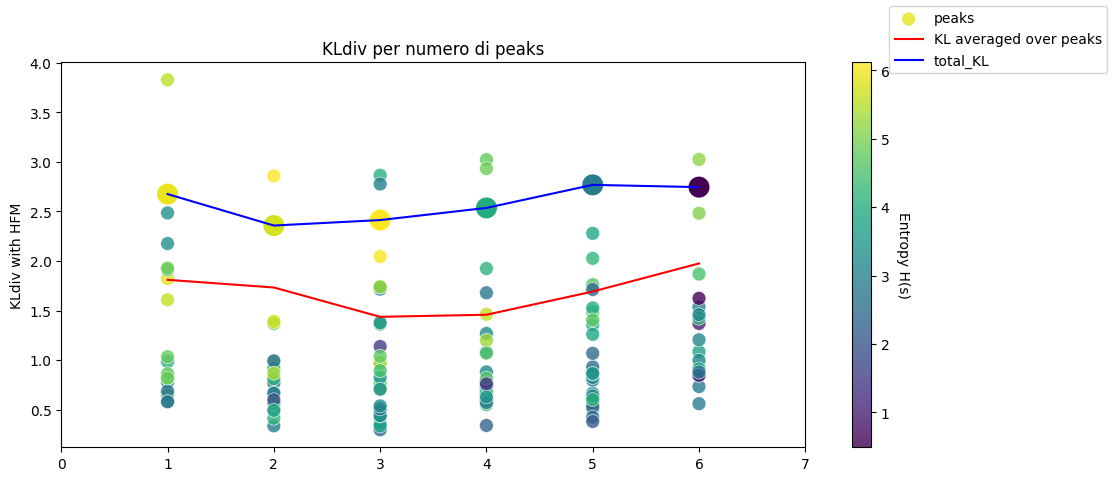

[19, 19, 30, 24, 26, 19]


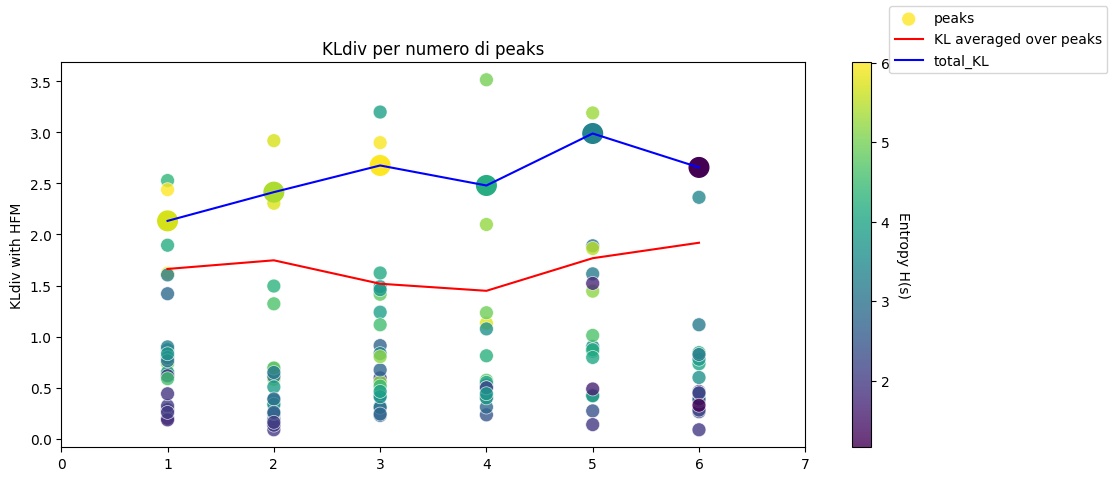

[23, 25, 24, 16, 16, 20]


In [137]:
plot_peaks_data(data_dict_ld12)
print(data_dict_ld12['peaks_number'])
plot_peaks_data(data_dict_ld12_val)
print(data_dict_ld12_val['peaks_number'])

## train over FashionMNIST

In [55]:
train_loader = train_loader_FashionMNIST
val_loader = val_loader_FashionMNIST
input_dim = 784


### latent_dim = 12


In [40]:
data_dict_ld12 = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [ ]:
#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1
threshold_n_factor = 0.8
g_value = np.log(2)

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)

#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)

#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)

#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)

#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)

#### features = 12, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6

my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld12_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, peaks_kwargs={'threshold_n_factor': threshold_n_factor}, kl_kwargs={'g': g_value})
accumulate_peaks_data(data_dict_ld12, current_data_dict)


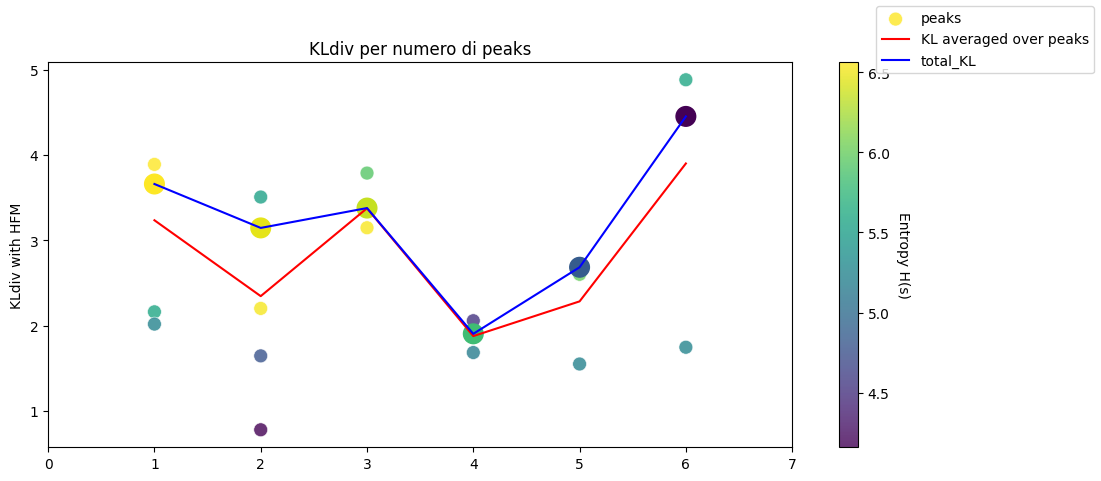

[3, 4, 2, 3, 2, 2]


In [42]:
plot_peaks_data(data_dict_ld12)
print(data_dict_ld12['peaks_number'])

### latent_dim = 8


In [ ]:
data_dict = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 1


In [158]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 2


In [159]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)


#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 3


In [160]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)



#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.5, g_HFM per KL = log2, hidden layer = 4


In [161]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.55, g_HFM per KL = log2, hidden layer = 5


In [162]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)

#### features = 8, g_model = log(2), epochs = 15, decrease_rate = 0.6, g_HFM per KL = log2, hidden layer = 6


In [163]:
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/FashionMNIST/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device)
accumulate_peaks_data(data_dict, current_data_dict)

### plot peaks_data

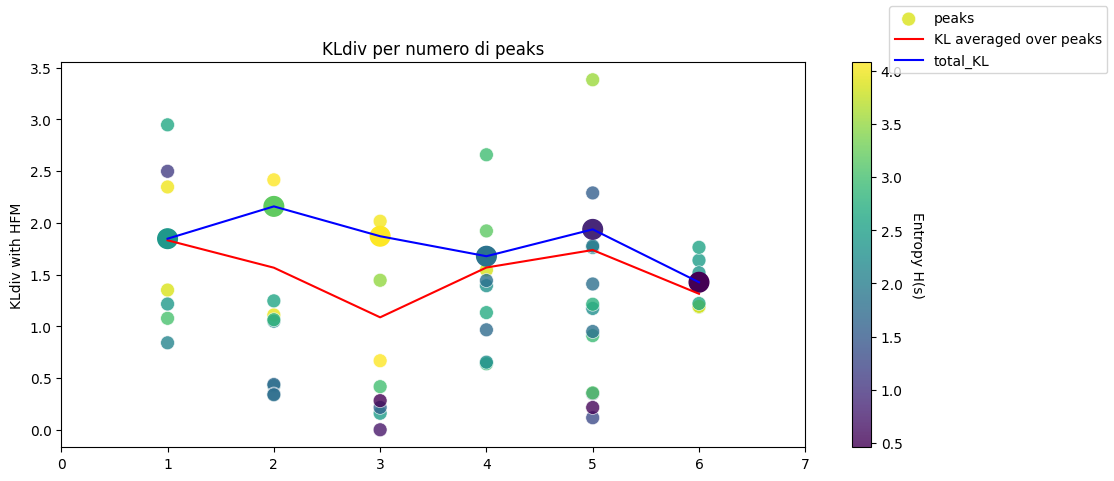

In [165]:
plot_peaks_data(data_dict)

# PriorHFM, different_klG

## train over MNIST

In [51]:
train_loader = train_loader_MNIST
val_loader = val_loader_MNIST
input_dim = 784

### latent_dim = 8

In [23]:
data_dict_ld8_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [24]:
different_klG = 1.7

# hidden layer = 1
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

print(data_dict_ld8_klg['peaks_number'])

[6, 6, 12, 5, 9, 5]


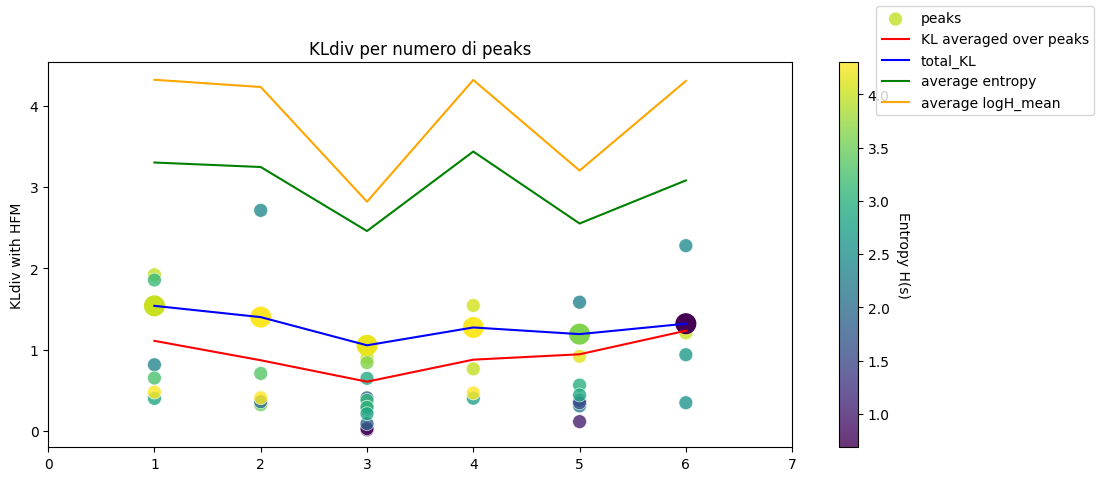

In [25]:
plot_peaks_data(data_dict_ld8_klg, plot_peaks_averages=True)

### latent_dim = 10

In [ ]:
data_dict_ld10_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [18]:
# hidden layer = 1
different_klG = 0.5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld10_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)


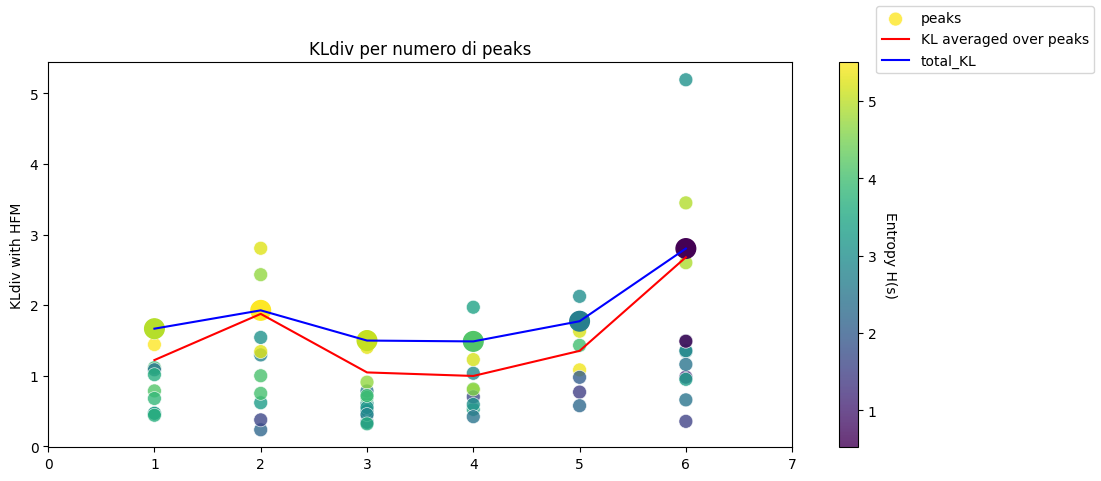

In [19]:
plot_peaks_data(data_dict_ld10_klg)

### latent_dim = 6

In [52]:
data_dict_ld6_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [53]:
# hidden layer = 1
g05 = 0.5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=6, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld6_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld6_klg, current_data_dict)

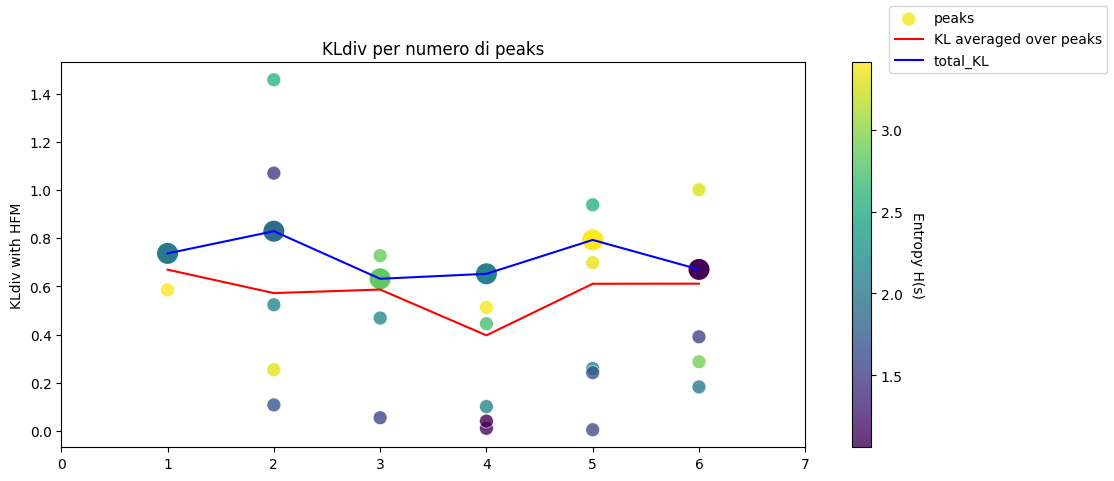

In [55]:
plot_peaks_data(data_dict_ld6_klg)

### latent_dim = 12

In [ ]:
data_dict_ld12_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [24]:
# hidden layer = 1
g05 = 0.5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep7_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=12, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld12_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': g05})
accumulate_peaks_data(data_dict_ld12_klg, current_data_dict)


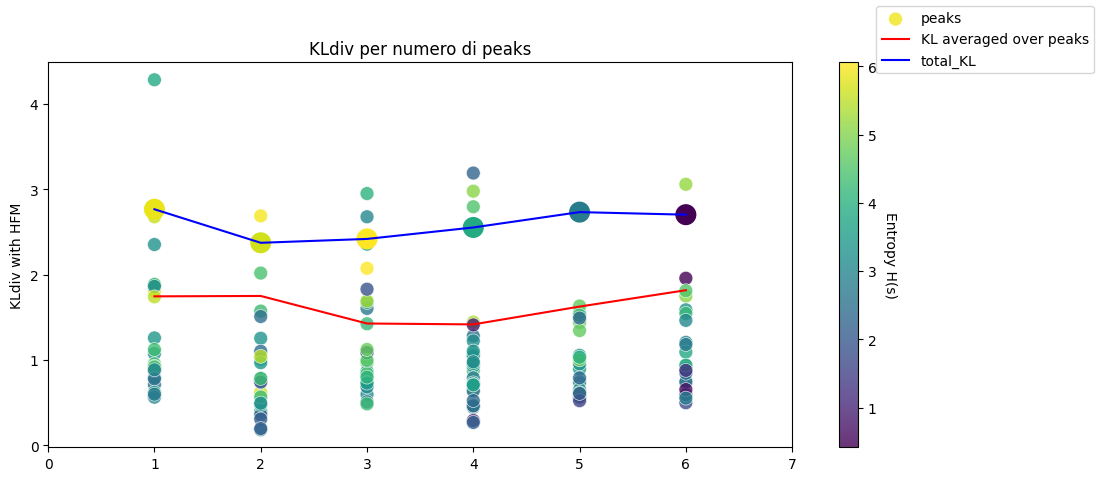

In [25]:
plot_peaks_data(data_dict_ld12_klg)

## train over pureHFM

In [40]:
train_loader = train_loader_pureHFM
val_loader = val_loader_pureHFM
input_dim = 512

### latent_dim = 8

In [46]:
data_dict_ld8_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_logh_mean_average':[], 'peaks_entropy_average':[]}

In [47]:
# hidden layer = 1
different_klG = 0.1
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld8_klg, current_data_dict)


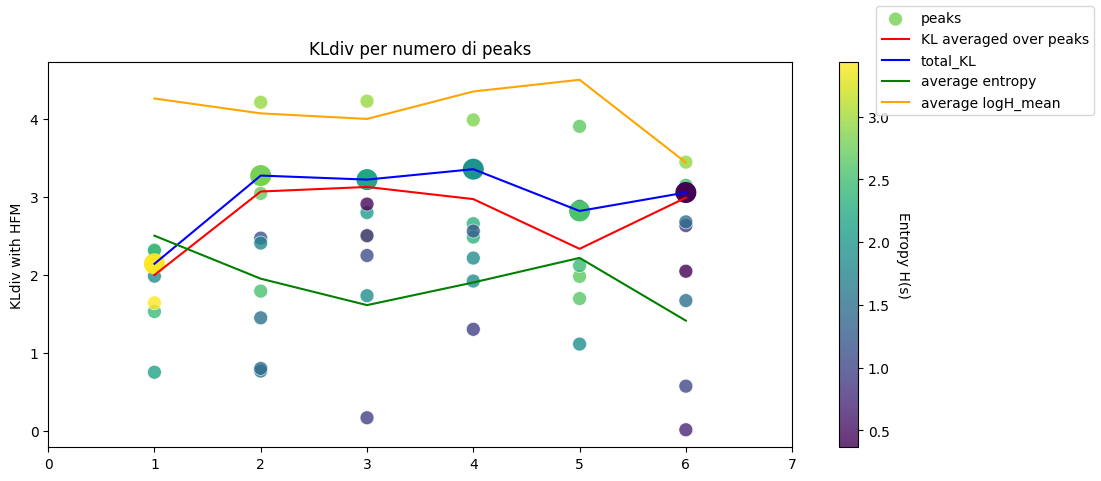

In [50]:
plot_peaks_data(data_dict_ld8_klg, True)

### latent_dim = 10

In [ ]:
data_dict_ld10_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [48]:
# hidden layer = 1
different_klG = 1.5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=10, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/pureHFM/ld10_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld10_klg, current_data_dict)


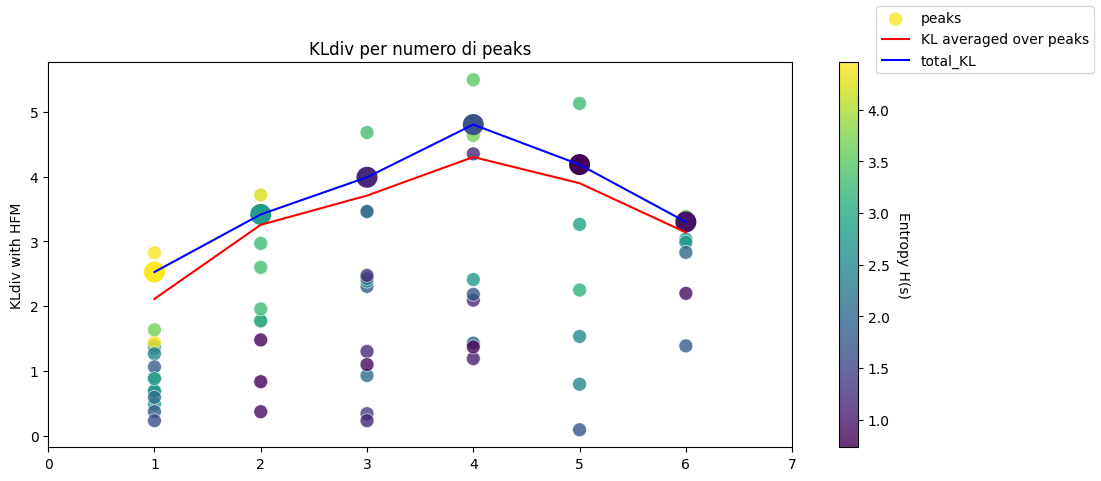

In [49]:
plot_peaks_data(data_dict_ld10_klg)

## train over expandedHFM 32-1024

In [25]:
train_loader = train_loader_expandedHFM_32_1024
val_loader = val_loader_expandedHFM_32_1024
input_dim = 1024

### latent_dim = 32

In [26]:
data_dict_ld32_klg = {'num_layers':[], 'layer_values':[], 'peaks_KL':[], 'peaks_entropy':[], 'average_KL':[], 'total_KL':[], 'total_entropy':[], 'peaks_number':[], 'peaks':[], 'peaks_entropy_average':[], 'peaks_logh_mean_average':[]}

In [27]:
different_klG = 0.1

# hidden layer = 1
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr05_gKLlog2_1hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)

# hidden layer = 2
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr05_gKLlog2_2hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)

# hidden layer = 3
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr05_gKLlog2_3hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)

# hidden layer = 4
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr05_gKLlog2_4hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)

# hidden layer = 5
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr05_gKLlog2_5hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)

# hidden layer = 6
my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=32, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/expandedHFM_32_1024/ld32_glog2_ep20_lmb01_LN_dr06_gKLlog2_6hl_0.pth', map_location=device))
current_data_dict = get_peaks_data(my_model, train_loader_expandedHFM_32_1024, device, kl_args={'g': different_klG})
accumulate_peaks_data(data_dict_ld32_klg, current_data_dict)


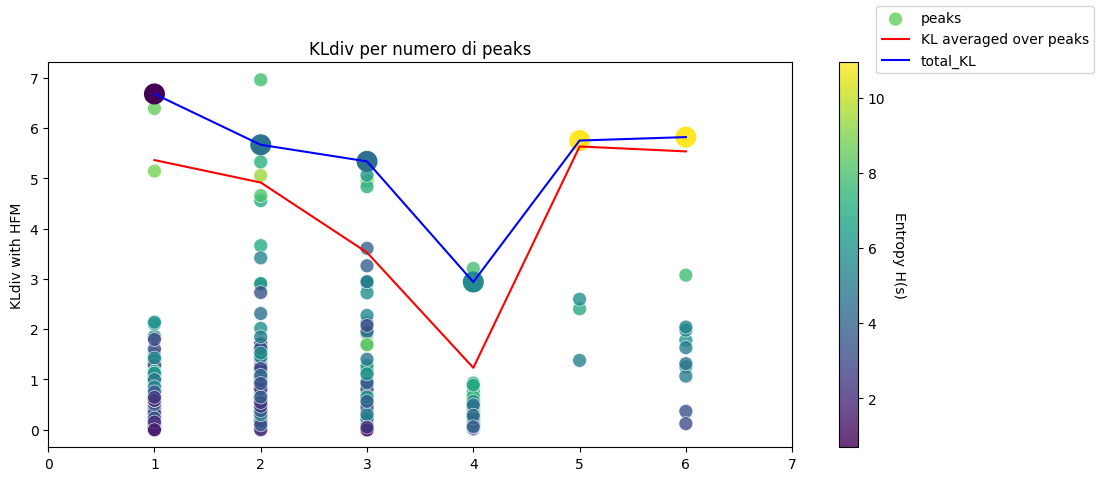

[96, 108, 63, 78, 4, 11]


In [28]:
plot_peaks_data(data_dict_ld32_klg)
print(data_dict_ld32_klg['peaks_number'])